In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, estimate_variance=1.0):
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance
        self.estimate_variance = estimate_variance
        self.estimate = 0.0
        self.error_covariance = 1.0

    def update(self, measurement):
        kalman_gain = self.error_covariance / (self.error_covariance + self.measurement_variance)
        self.estimate += kalman_gain * (measurement - self.estimate)
        self.error_covariance = (1 - kalman_gain) * self.error_covariance + self.process_variance
        return self.estimate

In [3]:
# Sahte Ölçüm Verileri Oluşturmaya Yarayan Fonksiyon
def mockMeasurementGenerator(numberOfMockData, noise_level = 0.5, real_distance = 0, random_seed = None):
    np.random.seed(random_seed)
    return np.random.normal(real_distance, noise_level, numberOfMockData)

In [4]:
# Sahte Ultrasonik Sensör Mesafe Tahmini Verisi Oluşturulması
mockUltrasonicSensorDataLength = 10000
noise_level = 0.8

ultrasonicSensorMeasurements = mockMeasurementGenerator(mockUltrasonicSensorDataLength, noise_level, 10)
"""
for i in mockMeasurementGenerator(mockUltrasonicSensorDataLength, noise_level, 20):
    ultrasonicSensorMeasurements = np.append(ultrasonicSensorMeasurements, i)
"""
kf = KalmanFilter(process_variance=1e-5, measurement_variance=noise_level**2)

kalman_estimates = []
for measurement in ultrasonicSensorMeasurements:
    kf_estimates = kf.update(measurement)
    kalman_estimates.append(np.mean(kf_estimates))

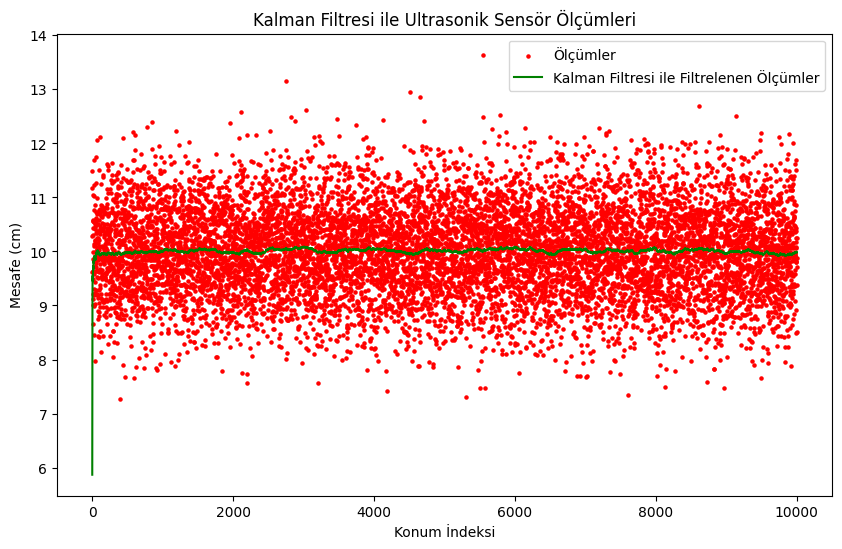

In [5]:
positions = np.arange(1, mockUltrasonicSensorDataLength + 1)

plt.figure(figsize=(10, 6))
plt.scatter(positions, ultrasonicSensorMeasurements, label='Ölçümler', color = "red", s = 5)
plt.plot(positions, kalman_estimates, 'g-', label='Kalman Filtresi ile Filtrelenen Ölçümler')
plt.xlabel('Konum İndeksi')
plt.ylabel('Mesafe (cm)')
plt.legend()
plt.title('Kalman Filtresi ile Ultrasonik Sensör Ölçümleri')
plt.show()